In [1]:
# All Imports
import sys 
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import collections
#from sklearn.neighbors import NearestNeighbors
#from gensim.test.utils import common_texts
import pickle

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile

/home/lilli/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
with open('test_documents1.json','r') as f:
    test_documents_json = json.load(f)

In [4]:
with open('train_documents.json','r') as f:
    train_documents_json = json.load(f)

In [5]:
train_documents = [TaggedDocument(i[0],i[1]) for i in train_documents_json]
test_documents = [TaggedDocument(i[0],i[1]) for i in test_documents_json]

In [6]:
print(len(test_documents),test_documents[5], train_documents[123])

18702 TaggedDocument(['i', 'the', 'you', 'to', 'and', 'a', 'me', 'it', 'my', 'is', 'your', 'on', 'are', 'am', 'be', 'so', 'this', 'what', 'when', 'time', 'come', 'go', 'down', 'if', 'want', 'make', 'say', 'day', 'at', 'where', 'more', 'still', 'leav', 'had', 'alon', 'stay', 'new', 'than', 'thought', 'without', 'put', 'other', 'found', 'sound', 'best', 'town', 'sometim', 'ani', 'ground', 'hit', 'everyon', 'felt', 'sens', 'fell', 'ten', 'knock', 'shoe', 'simpl', 'fail', 'almost', 'built', 'convinc', 'approach', 'attempt', 'chord', 'independ'], ['4097720', 20]) TaggedDocument(['la', 'te', 'tu', 'se', 'mi', 'e', 'lo', 'da', 'amor', 'con', 'una', 'al', 'che', 'il', 'di', 'non', 'ma', 'del', 'ha', 'ne', 'stare', 'ce', 'ho', 'color', 'io', 'cosa', 'c', 'sempr', 'tempo', 'casa', 'mio', 'g', 'chi', 'fa', 'sua', 'tua', 'f', 'sole', 'cuor', 'della', 'serpent', 'sta', 'lamor', 'author', 'suo', 'col', 'paura', 'fuori', 'qual', 'sangu'], ['3924215'])


In [8]:
with open('word_counts.json','r') as xc:
    word_count_dict= json.load(xc)

In [77]:
model = Doc2Vec(train_documents, vector_size=10, epochs=30, window=2, min_count=5, workers=6)

#model.build_vocab_from_freq(word_count_dict)

In [128]:
model.train(train_documents, total_examples=model.corpus_count, epochs=20)

In [14]:
#model = Doc2Vec(documents=train_documents, vector_size=15, epochs=4, window=5, min_count=5, workers=4)
fname = get_tmpfile("lyrics2vec_model")
model.save(fname)
  # you can continue training with the loaded model!

In [8]:
#model.save("doc2vec.model")
model = Doc2Vec.load("doc2vec.model")

In [130]:
inferred_vectors = []

for doc_id in range(len(test_documents)):
    inferred_vector = model.infer_vector(test_documents[doc_id].words)
    inferred_vectors.append([inferred_vector, test_documents[doc_id].tags])
    

In [131]:
with open("inferred_vectors","wb") as inf_json:
    pickle.dump(inferred_vectors,inf_json)
inf_json.close()

In [95]:
#genres = [i['primary_genres']['music_genre_list'][0]['music_genre']['music_genre_parent_id'] for i in tracks]
genres = [i[1][1] for i in inferred_vectors]
unique_colors = list(set(genres))
print(len(unique_colors))
colors = [unique_colors.index(i) for i in genres]


132


In [133]:
X = np.array([i[0] for i in inferred_vectors])
X_embedded = TSNE(n_components=2, perplexity=50).fit_transform(X)
X_embedded.shape

with open("t_sne_vectors","wb") as tsne_json:
    pickle.dump(X_embedded,tsne_json)
tsne_json.close()

In [51]:
clustering = DBSCAN(eps=4, min_samples=5).fit(X)

In [88]:
def most_similar_track(words):
    inferred_vector = model.infer_vector(words)
    sims = model.docvecs.most_similar([inferred_vector])
    for i in train_documents_json:
        if i[1][0] in [x[0] for x in sims[:3]]:
            print(' '.join(i[0]))
            print('\n')
    print(' '.join(set(words)))
    print('\n')


In [138]:
test = 6374
most_similar_track(test_documents[test].words) 
print(test_documents[test].tags)

time can one out down was see got from he let take would as life back heart could thing more tell man well mind an his some home ever place left lost made should old free same own mine close sweet fli line enough mani till may sure hell sea crazi rest went lead pull pray peac stori across thank fate front race famili mr bet cast highway journey grant asham blew horn jone traffic dale convict tragic weav


love when can there oh they get if got never say as at life yeah night look eye world tell who give keep dream well fall everi walk end sun sing realli song wrong seem mean real black heaven ride seen hell goe truth fool nobodi white blind moon moment lover full king fast answer bleed uh evil gold devil closer spin steal queen less confus golden hall illus sinner dancer maker sooner singer


love when can there oh they get if got never say as at life yeah night look eye world tell who give keep dream well fall everi walk end sun sing realli song wrong seem mean real black heaven ride 

<ipython-input-88-1f0b5b4ae243>:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  sims = model.docvecs.most_similar([inferred_vector])


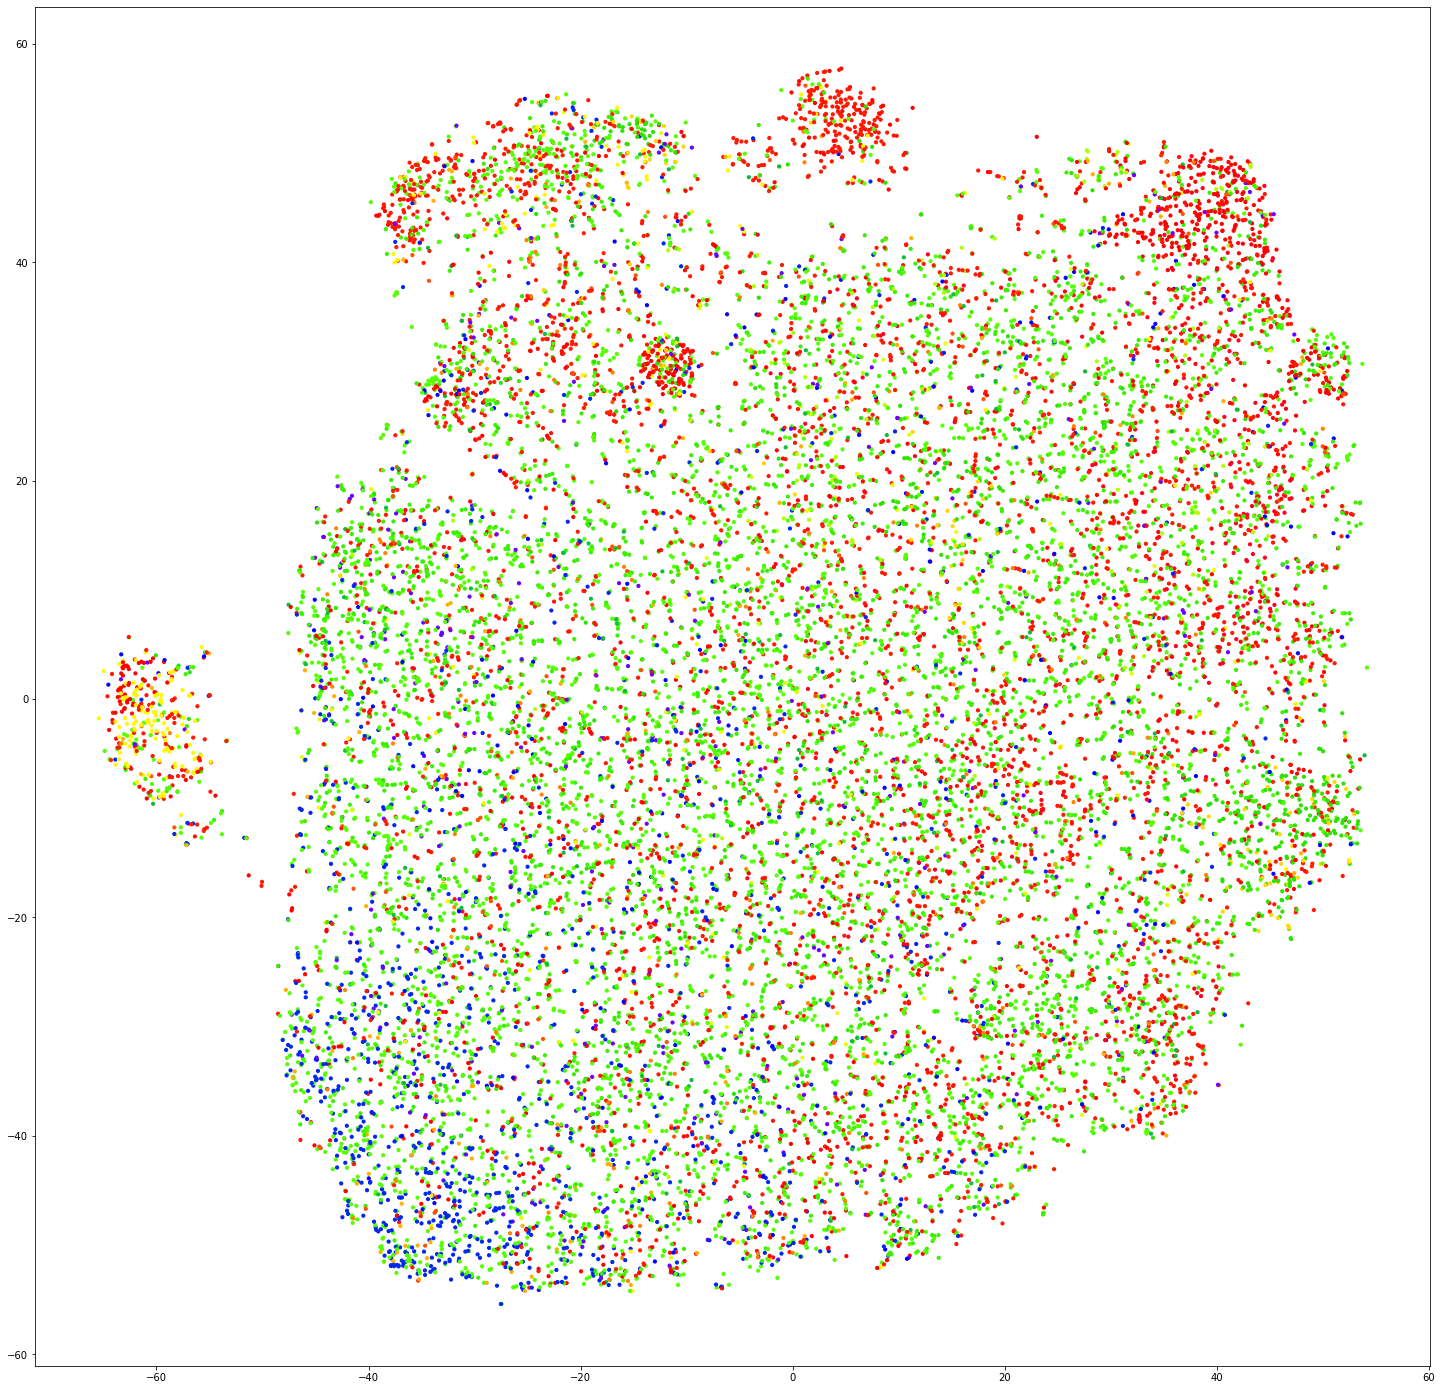

In [139]:
plt.figure(figsize=(25, 25))

plt.scatter([i[0] for i in X_embedded],[i[1] for i in X_embedded],c=countColors,cmap='prism', s=10)

In [34]:
#set([i['primary_genres']['music_genre_list'][0]['music_genre']['music_genre_parent_id'] for i in tracks])

counter = collections.Counter(genres)
print(counter)



Counter({21: 4784, 14: 3696, 20: 2971, 1153: 1219, 6: 681, 18: 486, 22: 471, 15: 462, 7: 379, 10: 319, 34: 246, 12: 237, 11: 232, 1117: 228, 2: 172, 17: 160, 19: 149, 50000064: 135, 1121: 121, 24: 106, 1149: 95, 1004: 92, 1006: 82, 1152: 79, 23: 74, 8: 68, 1144: 59, 1225: 57, 1094: 50, 1035: 50, 1124: 48, 1155: 41, 1101: 37, 1133: 37, 1119: 36, 16: 33, 1073: 28, 1002: 24, 1072: 21, 1122: 21, 4: 19, 3: 18, 1160: 15, 5: 15, 1123: 14, 1156: 14, 1120: 14, 1037: 13, 13: 13, 50000066: 12, 100007: 12, 1289: 12, 1205: 11, 1136: 10, 1076: 10, 1226: 9, 1062: 8, 1065: 8, 1067: 8, 1098: 7, 1131: 7, 1118: 7, 1100: 7, 1175: 6, 1001: 6, 1005: 6, 1048: 5, 1259: 5, 1080: 5, 1042: 5, 1143: 4, 1227: 4, 1295: 4, 1134: 4, 1146: 4, 1116: 3, 1068: 3, 1097: 3, 1063: 3, 1135: 3, 1051: 3, 27: 3, 1132: 3, 1150: 3, 1058: 3, 1151: 3, 1034: 2, 1176: 2, 1194: 2, 1127: 2, 1192: 2, 25: 2, 1013: 2, 1078: 2, 1203: 2, 1074: 2, 1061: 2, 1064: 2, 1139: 2, 1070: 2, 1096: 2, 1220: 2, 100020: 1, 1686: 1, 100019: 1, 1114: 1, 2

In [32]:
#new_test_docs = []

for j in range(len(train_documents)):
    for i in range(len(test_documents1)):
        if test_documents1[i][1][0] == train_documents[j][1][0]:
            new_test_docs.append([train_documents[j][0],test_documents1[i][1]])
            break
    if len(new_test_docs) >= 18702:
        break
print(len(new_test_docs),len(test_documents1),len(test_documents))

18702 18702 27143


In [26]:
#with open('newInfos.json','r') as f:
#    tracks_genres = json.load(f)

In [38]:
with open('test_documents.json','r') as file:
    test_tracks = json.load(file) 

In [42]:
new_test_documents = []
for (did,doc) in test_tracks.items():
    words = []
    for (word,count) in doc.items():
        letters = word_dump[int(word)-1]
        words += [letters  for i in range(int(count))]
    new_test_documents.append([words,[did]])

[['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'to', 'to', 'to', 'and', 'and', 'and', 'and', 'a', 'a', 'a', 'me', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'not', 'not', 'not', 'in', 'my', 'my', 'my', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'of', 'of', 'of', 'of', 'your', 'your', 'your', 'your', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'do', 'on', 'are', 'am', 'all', 'all', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'so', 'so', 'so', 'so', 'so', 'know', 'know', 'this', 'this', 'this', 'this', 'but', 'but', 'what', 'what', 'just', 'just', 'when', 'when', 'when', 'when', 'when', 'when', 'when', 

In [49]:
docs_t = []
for i in range(len(new_test_documents)):
    for j in range(len(test_documents1)):
        if new_test_documents[i][1][0] == test_documents1[j][1][0]:
            docs_t.append([new_test_documents[i][0],test_documents1[j][1]])

[['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'you', 'you', 'you', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'and', 'and', 'a', 'a', 'me', 'it', 'it', 'it', 'it', 'my', 'my', 'is', 'is', 'your', 'on', 'on', 'are', 'are', 'are', 'are', 'am', 'am', 'be', 'be', 'so', 'this', 'what', 'what', 'what', 'when', 'time', 'come', 'go', 'down', 'down', 'down', 'if', 'if', 'want', 'want', 'want', 'make', 'make', 'make', 'make', 'say', 'say', 'say', 'say', 'say', 'say', 'day', 'at', 'where', 'more', 'more', 'more', 'more', 'still', 'still', 'still', 'still', 'leav', 'had', 'had', 'had', 'alon', 'alon', 'alon', 'alon', 'alon', 'alon', 'alon', 'alon', 'stay', 'new', 'new', 'than', 'than', 'than', 'than', 'thought', 'without', 'put', 'put', 'put', 'put', 'other', 'other', 'other', 'other', 'found', 'sound', 'best', 'best', 'best', 'best', 'town', 'town', 'sometim', 'sometim', 'ani',

In [28]:
print(len(docs_t))

NameError: name 'docs_t' is not defined

In [27]:
tracks = []
for i in inferred_vectors:
    tracks.append(tracks_genres[i[1][0]])